# Init

In [2]:
%ls ../data

test_data_cleaned.csv  test_predictions.csv  train_data_cleaned.csv


In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [17]:
import datetime
import numpy as np
import pandas as pd
from IPython.display import display

pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline

# Read the training data

In [5]:
df_train = pd.read_csv(
    "../data/train_data_cleaned.csv",
    # Note: some of the variables should be treated as 
    dtype={"year_week": str, "recipe_id": str},
)
df_train.shape

(2939, 27)

## Check some samples

In [141]:
df_train.tail()

,year_week,recipe_id,recipe_name,product_type,calories,carbs,cooking_time,cuisine,description,difficulty,dish_type,heat_level,fat,is_classic,number_of_ingredients_per_recipe,preferences,carbs_content,dish_types,seasons,protein_types,proteins,course_type,cooking_tip,meta_tags,percentage_of_local_ingredients,protein_cuts,sales
2934,201944,38195,Ricotta & Mushroom Cannelloni,2 person,860.0,50.0,time_level_5,italian,Cannelloni is comfort food straight out of central casting. Tender fresh lasagna sheets are roll...,easy,veggie,no_heat,62.0,No,6,dairy,pasta_incl_gnocchi_spatzle,pasta,NaN,dairy,30.0,main,NaN,kid_friendly,0.0,NaN,2015
2935,201944,38196,Ricotta & Mushroom Cannelloni,family,760.0,46.0,time_level_5,italian,Cannelloni is comfort food straight out of central casting. Tender fresh lasagna sheets are roll...,easy,veggie,no_heat,54.0,No,6,dairy,pasta_incl_gnocchi_spatzle,pasta,NaN,dairy,25.0,main,NaN,kid_friendly,0.0,NaN,374
2936,201944,38197,Chicken Pad Thai,2 person,960.0,104.0,time_level_4,thai,Pad Thai is one of our favorite street foods to recreate at home. This version is loaded with fl...,easy,meat,no_heat,37.0,No,9,"fish,poultry",rice_noodles,noodle,NaN,"fish,poultry",56.0,main,NaN,"healthy_choice,kid_friendly,quick",0.0,NaN,1472
2937,201944,38199,Smothered Pork Chops,2 person,760.0,51.0,time_level_5,new_american,"Ever wondered what a food hug is? Well, look no further—this dish is it! Juicy pork chops are fi...",easy,meat,no_heat,42.0,No,8,"pork,poultry",grains,meat_and_side,all_seasons,"pork,poultry",43.0,main,NaN,kid_friendly,0.0,chops_boneless,1134
2938,201944,38284,Lemon-Chicken Drumsticks,family,920.0,52.0,time_level_5,new_american,One-pan dinners mean easy clean-up—and the best ones offer a nice variety of flavors and colors ...,easy,meat,no_heat,47.0,No,6,poultry,potato,"meat_and_side,one_pot",NaN,poultry,73.0,main,NaN,"healthy_choice,kid_friendly",0.0,NaN,190


In [142]:
df_train.sample(5)

,year_week,recipe_id,recipe_name,product_type,calories,carbs,cooking_time,cuisine,description,difficulty,dish_type,heat_level,fat,is_classic,number_of_ingredients_per_recipe,preferences,carbs_content,dish_types,seasons,protein_types,proteins,course_type,cooking_tip,meta_tags,percentage_of_local_ingredients,protein_cuts,sales
2759,201940,36631,Sweet & Sour Meatballs,2 person,720.0,69.0,time_level_5,swedish,"When it comes to meatballs, Italian-style ones get a lot of the spotlight, but we think sweet an...",easy,meat,no_heat,33.0,No,9,beef,potato,meat_and_side,NaN,beef,39.0,main,NaN,kid_friendly,0.0,ground_mince,3268
878,201831,15661,Grass-Fed Burger,family,800.0,40.0,time_level_5,new_american,"Meaty, grass-fed burgers are cooked in a skillet, then swapped out for juicy tomatoes that get c...",easy,meat,no_heat,545.0,No,4,beef,"panko_and_breadcrumbs,bread_and_others",burgers,all_seasons,beef,39.0,main,NaN,kid_friendly,0.0,burger_patty,536
1301,201852,18813,Stir-Fried Veggie Congee,2 person,690.0,68.0,time_level_4,NaN,"Congee, a traditional Chinese rice porridge, is the perfect example of comfort food in a bowl. T...",easy,veggie,no_heat,40.0,No,9,egg,rice,veggie_and_side,all_seasons,egg,14.0,main,NaN,NaN,0.0,no_cut,865
1986,201921,20991,Cincinatti Chili Con Carne,family,1070.0,114.0,time_level_5,NaN,Cincinnati chili is a regional treasure of deliciousness. What makes this chili so unique? The c...,easy,meat,no_heat,44.0,No,10,beef,pasta_incl_gnocchi_spatzle,meat_and_side,all_seasons,beef,51.0,main,NaN,"kid_friendly,quick",0.0,ground_mince,3866
2390,201931,17745,Shrimp Fajitas,2 person,729.0,75.0,time_level_3,NaN,The sound of fajitas sizzling in a skillet is the stuff of dreams. Especially when they're shrim...,easy,fish,no_heat,34.5,No,9,shellfish,tortillas_and_wraps,tacos_tortillas_dishes,all_seasons,shellfish,30.5,main,NaN,"quick,kid_friendly",0.0,NaN,2120


# Sanity checks

## Main checks

In [143]:
df_train.shape

(2939, 27)

In [144]:
print(f"Number of duplicates: {df_train.duplicated().sum()}")

Number of duplicates: 0


In [145]:
# Number of NaNs per each row
df_train.isnull().sum(axis=1).value_counts()

1     1269
2      738
11     369
3      210
12     208
13      81
15      27
4       18
16      14
18       3
5        2
dtype: int64

In [146]:
# Note: sorting trick helps to separate numerical from categorical variables
df_train.describe(include="all").T.sort_values("top")

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
recipe_id,2939,1931,14445,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_type,2939,4,2 person,1339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_week,2939,96,201805,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recipe_name,2939,931,AFC Braised Black Bean Stew,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_classic,2939,1,No,2939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,2935,980,"Pad Thai is one of our favorite street foods to recreate at home. Typically, it requires a lot o...",28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seasons,2014,10,all_seasons,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN
difficulty,2930,1,easy,2930,NaN,NaN,NaN,NaN,NaN,NaN,NaN
course_type,2236,1,main,2236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dish_type,2521,4,meat,1411,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Making sure that there is one unique recipe per week
df_train.groupby(["year_week", "recipe_id"]).count().recipe_name.max()

1

## Notes
1. `cooking_tip` could be dropped, since it doesn't have any non-NaN values
2. The `is_classic` variable could be dropped since they have only one unique values.
3. Some featres can have either one unique value or NaN, they unlikely to be helpful, but it might be important to investigate it later. Features: `percentage_of_local_ingredients`, `difficulty`, `course_type`. Although it might make sense to check these features, since there might be an explanation for the NaNs
4. `number_of_ingredients_per_recipe` with 0 ingredients. it looks suspicious and should be investigate
5. `calories=0`, probably just rounded number, but might be important to check it
5. There are more unique IDs compare to the uniuqe descriptions which is strage. Maybe some of the recipes got copied and some information for them got replced (but not ncessary description).
6. `seasons` variable has value `all_seasons` which is very common, it's possible that this feature might be less useful
7. `cooking_time` and `heat_level` probably could be converted to the ordinal variable.
8. `heat_level` has a strange value `non_spicy`?

# Check the data a bit closer

## year_week

In [147]:
import datetime
# Experimenting with valid parsing pattern
print(datetime.datetime.strptime('201801-1', "%G%V-%u"))
print(datetime.datetime.strptime('201825-1', "%G%V-%u"))
print(datetime.datetime.strptime('201901-1', "%G%V-%u"))

2018-01-01 00:00:00
2018-06-18 00:00:00
2018-12-31 00:00:00


In [18]:
# Note: additional -1 indicates that we always pick Monday as the starting day of the week, otherwise logic doesn't work
df_train["week_day"] = df_train.year_week.apply(lambda year_week: datetime.datetime.strptime(year_week + '-1', "%G%V-%u"))
df_train["week_day"]

0      2018-01-01
1      2018-01-01
2      2018-01-01
3      2018-01-01
4      2018-01-01
          ...    
2934   2019-10-28
2935   2019-10-28
2936   2019-10-28
2937   2019-10-28
2938   2019-10-28
Name: week_day, Length: 2939, dtype: datetime64[ns]

In [150]:
# Sanity check, making sure that there is always constant distance between week days (7 days)
assert len(np.unique(np.diff(df_train["week_day"].unique()))) == 1

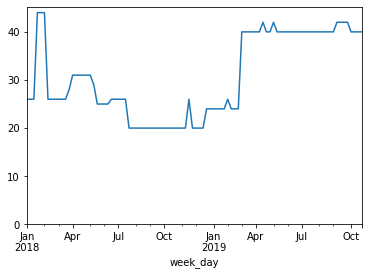

In [152]:
df_train.groupby("week_day").count().recipe_id.plot()
plt.ylim(bottom=0);

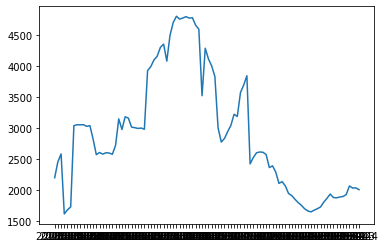

In [14]:
df_stats = df_train.groupby("year_week").agg({"sales": "sum", "recipe_id": "count"})
plt.plot(df_stats.sales / df_stats.recipe_id);

## Sales

### Low counts

In [153]:
df_train.sales.value_counts().head(20)

6      106
4       60
3       58
258      8
126      7
408      7
175      7
387      7
979      7
153      6
5        6
38       6
190      6
263      6
12       6
257      5
239      5
304      5
127      5
210      5
Name: sales, dtype: int64

In [154]:
df_train[df_train.sales <= 20].sales.value_counts().head(20)

6     106
4      60
3      58
12      6
5       6
9       3
Name: sales, dtype: int64

In [155]:
df_train[df_train.sales <= 10].year_week.max()

'201829'

In [156]:
(df_train
 [df_train.sales == 6]
 [["year_week", "recipe_id", "recipe_name", "description", "sales"]]
 .sort_values("year_week")
 .head(20)
)

,year_week,recipe_id,recipe_name,description,sales
2,201801,14449,AFC Vegetarian Pad Thai,"Pad Thai is one of our favorite street foods to recreate at home. Typically, it requires a lot o...",6
11,201801,14446,AFC Skillet Chicken Parmesan,We're giving chicken parmesan a minimalist makeover. We're taking out the hard work by leaving b...,6
13,201801,14448,AFC Braised Black Bean Stew,"When we want a hearty, nutritious dinner and we want it quick, braised beans are the answer. Her...",6
17,201801,14447,AFC Country Fried Steak,This nostalgic meal is a snapshot of classic American comfort food. Breaded minute steaks (a fav...,6
19,201801,14444,AFC Vietnamese Caramel Chicken,"This meal is a riff on the Chinese takeout of our dreams - fresh and quick, but nuanced and flav...",6
22,201801,14445,AFC Oven-Fried Berbere Chicken,We’ve taken crispy chicken to a whole new level with the addition of Berbere spice: an Ethiopian...,6
31,201802,14446,AFC Skillet Chicken Parmesan,We're giving chicken parmesan a minimalist makeover. We're taking out the hard work by leaving b...,6
35,201802,14447,AFC Country Fried Steak,This nostalgic meal is a snapshot of classic American comfort food. Breaded minute steaks (a fav...,6
36,201802,14445,AFC Oven-Fried Berbere Chicken,We’ve taken crispy chicken to a whole new level with the addition of Berbere spice: an Ethiopian...,6
38,201802,14444,AFC Vietnamese Caramel Chicken,"This meal is a riff on the Chinese takeout of our dreams - fresh and quick, but nuanced and flav...",6


### Distribution of sales

<AxesSubplot:ylabel='Frequency'>

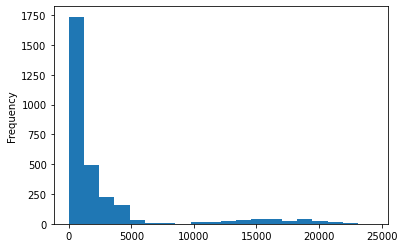

In [157]:
df_train.sales.plot(kind="hist", bins=20)

<AxesSubplot:ylabel='Frequency'>

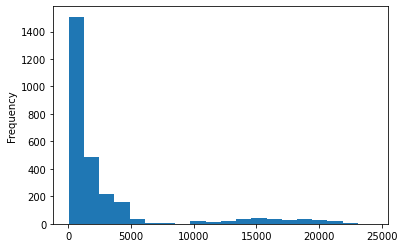

In [158]:
df_train[df_train.sales >= 20].sales.plot(kind="hist", bins=20)

<AxesSubplot:ylabel='Frequency'>

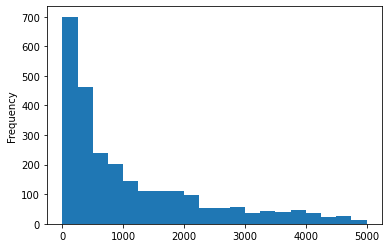

In [159]:
df_train[df_train.sales <= 5000].sales.plot(kind="hist", bins=20)

<AxesSubplot:ylabel='Frequency'>

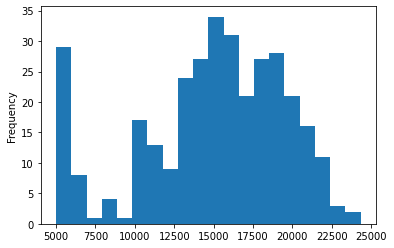

In [160]:
df_train[df_train.sales >= 5000].sales.plot(kind="hist", bins=20)

### Change in sales over time

(0.0, 107182.65)

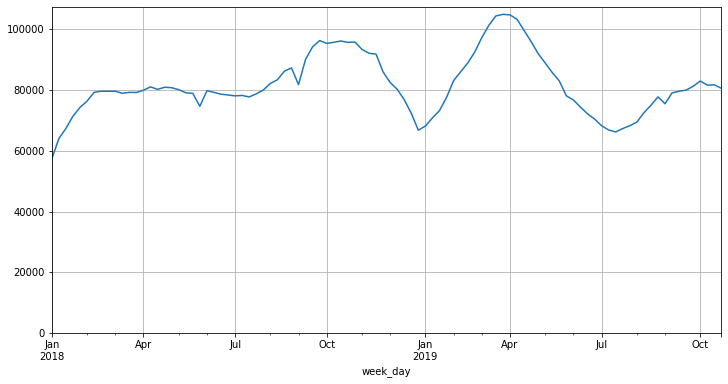

In [166]:
df_train.groupby("week_day").sales.sum().plot(figsize=(12, 6))
plt.grid()
plt.ylim(bottom=0)

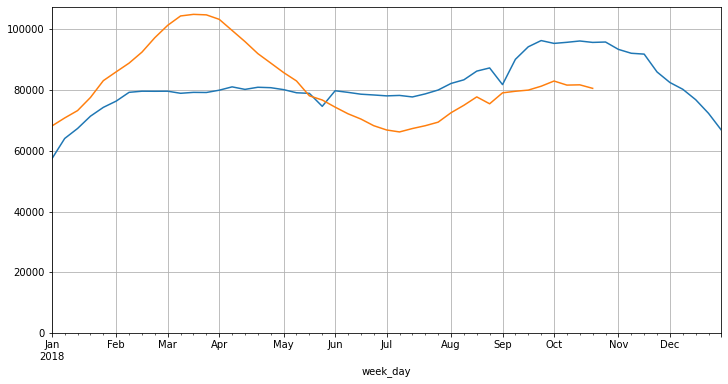

In [224]:
df_agg = df_train.groupby("week_day").sales.sum()
df_agg[df_agg.index < datetime.datetime(2019, 1, 1)].plot(figsize=(12, 6))
df_agg_new = df_agg[df_agg.index >= datetime.datetime(2019, 1, 1)]
df_agg_new.index -= datetime.timedelta(days=365)
df_agg_new.plot(figsize=(12, 6))
# df_agg.plot(figsize=(12, 6))
plt.grid()
plt.ylim(bottom=0);

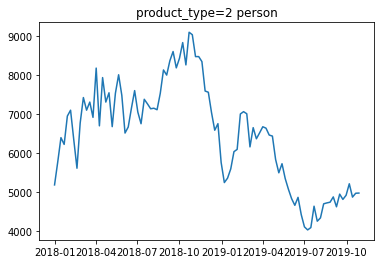

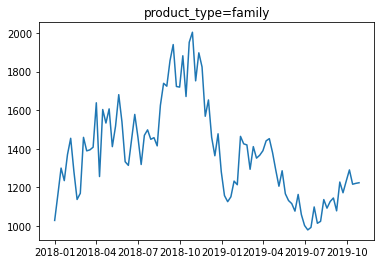

In [25]:
df_stats = (df_train
    [df_train.product_type.isin(["2 person", "family"])]
    .groupby(["week_day", "product_type"])
    .sales
    .std()
    .reset_index()
)
for product_type, df_stats_per_type in df_stats.groupby("product_type"):
    plt.title(f"product_type={product_type}")
    plt.plot(df_stats_per_type.week_day, df_stats_per_type.sales)
    plt.show()

### Notes

* low `sales` counts (< 20) look a bit suspicious. they also apear only before 201829
* Looks like distribution is bimodal
* aggregated timeseries (sales per week) shows drop near the end of 2018 and then spike which resulted in another drop in mid 2019. Another drop was at the beggining of 2018 (201801). It might be fair to assume that there is some sort of seasonality (e.g. clients order less when it's close to the new year which could be used as a feature)
* spike near april 2019 conicides with increase in number of unique recipes per week. it might be related

## Check low-cardinality features

In [167]:
for feature in ["product_type", "seasons", "dish_type", "heat_level", "cooking_time"]:
    print("-" * 30)
    print(feature)
    display(df_train[feature].value_counts(dropna=False))

------------------------------
product_type


2 person    1339
family      1335
z_amazon     216
add_on        49
Name: product_type, dtype: int64

------------------------------
seasons


all_seasons             1953
NaN                      925
summer                    22
autumn                    10
spring                     8
winter                     8
spring,autumn,winter       4
easter                     4
autumn,winter              2
summer,bbq                 2
thanksgiving               1
Name: seasons, dtype: int64

------------------------------
dish_type


meat                1411
veggie               876
NaN                  418
fish                 221
wine_and_dessert      13
Name: dish_type, dtype: int64

------------------------------
heat_level


no_heat          1874
NaN               716
optional_heat     276
high               71
non_spicy           2
Name: heat_level, dtype: int64

------------------------------
cooking_time


time_level_4    1359
time_level_5    1121
NaN              291
time_level_3     145
time_level_6      19
time_level_7       4
Name: cooking_time, dtype: int64

## Check `number_of_ingredients_per_recipe`

In [168]:
# Note: in order to fit full description within each cell
pd.set_option('display.max_colwidth', -1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [169]:
df_train.number_of_ingredients_per_recipe.value_counts()

6     553
8     527
7     506
9     496
5     359
10    237
4     184
3     55 
11    8  
2     7  
0     6  
1     1  
Name: number_of_ingredients_per_recipe, dtype: int64

In [170]:
(df_train
 [["number_of_ingredients_per_recipe", "year_week", "sales", "recipe_name", "description"]]
 .sort_values("number_of_ingredients_per_recipe")
 .head(30)
)

,number_of_ingredients_per_recipe,year_week,sales,recipe_name,description
778,0,201827,308,Grilled Flatbread Pizza,"If you don’t have a grill or grill pan, preheat the broiler with the top rack 6 inches from the heat source. Broil the naan in place of grilling in step 3 to toast on one side, about 3 minutes. After adding the tomatoes, mozzarella, and Parmesan, return to the top oven rack and broil until cheese is melted and the bottom of the flatbread is crisp and browned, about 3 minutes more."
777,0,201827,2120,Grilled Flatbread Pizza,"If you don’t have a grill or grill pan, preheat the broiler with the top rack 6 inches from the heat source. Broil the naan in place of grilling in step 3 to toast on one side, about 3 minutes. After adding the tomatoes, mozzarella, and Parmesan, return to the top oven rack and broil until cheese is melted and the bottom of the flatbread is crisp and browned, about 3 minutes more."
2173,0,201926,190,Grilled Flatbread Pizza,"If you don’t have a grill or grill pan, preheat the broiler with the top rack 6 inches from the heat source. Broil the naan in place of grilling in step 3 to toast on one side, about 3 minutes. After adding the tomatoes, mozzarella, and Parmesan, return to the top oven rack and broil until cheese is melted and the bottom of the flatbread is crisp and browned, about 3 minutes more."
2175,0,201926,831,Grilled Flatbread Pizza,"If you don’t have a grill or grill pan, preheat the broiler with the top rack 6 inches from the heat source. Broil the naan in place of grilling in step 3 to toast on one side, about 3 minutes. After adding the tomatoes, mozzarella, and Parmesan, return to the top oven rack and broil until cheese is melted and the bottom of the flatbread is crisp and browned, about 3 minutes more."
1170,0,201846,2602,Detroit-Style Pizza,"Detroit's auto industry has close ties to its homegrown pizza style. Food history tells us that it started when Detroit pizza-makers used the blue steel pans that were used as storage in the auto factories. The deep, sloped shape of the pans gave way to the cheesy, crisped outside crust, as the cheese would ooze between pan and pie, crisping in the oven. Most important—sauce must be the top lay..."
1175,0,201846,456,Detroit-Style Pizza,"Detroit's auto industry has close ties to its homegrown pizza style. Food history tells us that it started when Detroit pizza-makers used the blue steel pans that were used as storage in the auto factories. The deep, sloped shape of the pans gave way to the cheesy, crisped outside crust, as the cheese would ooze between pan and pie, crisping in the oven. Most important—sauce must be the top lay..."
1185,1,201847,979,Big Martha's Mashed Potatoes,NaN
1293,2,201852,327,Zero Stress Breakfast Bake,"Easter is a time to celebrate with family and friends and we love that it is so synonymous with brunch. Since everyone seems to be looking for eggs on Easter (literally), this comforting egg and sausage breakfast bake is the perfect dish to have in your back pocket for the weekend brunch festivities! It feeds 8–10 people—use it to serve your guests or to bring to a friend or relative’s celebrat..."
912,2,201833,473,Pasta Puttanesca,"Puttanesca, a flavorful tomato sauce from southern Italy, is made with lots of garlic, capers, and olives. We love how quickly this dish comes together—once you’ve chopped the ingredients, all you have to do is throw them in a large skillet. We've added succulent US Gulf shrimp for a little something special. Cook, relax, and enjoy!"
1458,2,201907,4548,Creamy Pesto Lasagna,"Mascarpone is a soft Italian cheese, known for its ultra creamy texture and light, slightly sweet, taste. We pair mascarpone with herby basil pesto, coming together to create a decadent sauce for fresh lasagna noodles. The noodles are layered with the creamy pesto sauce, fresh baby spinach, and roasted red peppers for a veggie lasagna so good, even the meat lovers in your life will want seconds..."


In [171]:
# Some pizzas have more than 0 or 1 ingredients
(df_train
 [df_train.recipe_name.str.lower().str.contains("pizza")]
 [["number_of_ingredients_per_recipe", "year_week", "recipe_name", "description"]]
)

,number_of_ingredients_per_recipe,year_week,recipe_name,description
100,6,201804,Roasted Veggie White Pizza,"This white pizza might be without sauce, but it definitely isn't without flavor! We char a combo of zucchini, poblano peppers, and scallions, before they get dressed in a lemon zest-garlic topping. The dough is layered up with seasoned ricotta, the roasted veggies, and mozzarella. Baked until crisp and bubbling, you can serve the pizza with the peppery arugula salad on top or alongside. Your ch..."
104,6,201804,Roasted Veggie White Pizza,"This white pizza might be without sauce, but it definitely isn't without flavor! We char a combo of zucchini, poblano peppers, and scallions, before they get dressed in a lemon zest-garlic topping. The dough is layered up with seasoned ricotta, the roasted veggies, and mozzarella. Baked until crisp and bubbling, you can serve the pizza with the peppery arugula salad on top or alongside. Your ch..."
106,10,201804,QVCF Cheesy Fajita Pizza,"This fajita pizza is the mashup of all mashups. All the bell pepper-y goodness we love about fajitas, melted cheese, cool sour cream, and caramelized onions, all on yeasty pizza dough. It’s a surefire hit, and we’re betting kids won’t complain about eating with their hands! Cook, relax, and enjoy!\r\n"
107,10,201804,QVC Cheesy Fajita Pizza,"This fajita pizza is the mashup of all mashups. All the bell pepper-y goodness we love about fajitas, melted cheese, cool sour cream, and caramelized onions, all on yeasty pizza dough. It’s a surefire hit, and we’re betting kids won’t complain about eating with their hands! Cook, relax, and enjoy!\r\n"
147,10,201805,QVC Cheesy Fajita Pizza,"This fajita pizza is the mashup of all mashups. All the bell pepper-y goodness we love about fajitas, melted cheese, cool sour cream, and caramelized onions, all on yeasty pizza dough. It’s a surefire hit, and we’re betting kids won’t complain about eating with their hands! Cook, relax, and enjoy!\r\n"
...,...,...,...,...
2479,9,201933,Cheesy Pizza Beans,"Cheesy. Pizza. Beans. Yes, that's right, pizza beans. Tender beans make up the base of this dish, loaded with the familiar flavors of, you guessed it, pizza! The beans simmer with onions, tomato paste, and a classic pizza seasoning blend. Then they are topped with fresh baby spinach and melty mozzarella cheese for a hearty vegetarian dish, even the pickiest of eaters will love."
2771,7,201940,Steak Pizzaiola,"Break out the red checkered table cloth! This Italian dinner is better than your local red sauce joint. Steak Pizzaiola is Neapolitan tradition, and for a good reason—it's delicious! This simple method of simmering seared steaks in a rich tomato sauce makes for a super flavorful and uber tender piece of meat that's still perfectly pink in the center."
2772,7,201940,Steak Pizzaiola,"Break out the red checkered table cloth! This Italian dinner is better than your local red sauce joint. Steak Pizzaiola is Neapolitan tradition, and for a good reason—it's delicious! This simple method of simmering seared steaks in a rich tomato sauce makes for a super flavorful and uber tender piece of meat that's still perfectly pink in the center."
2786,9,201941,Cheesy Cauliflower Pizza Bake,"Cauliflower has proven itself to be a credible stunt double, standing in for many of our carb-loaded favorites—pizza crust, rice, gnocchi, to name a few. Here, the do-it-all vegetable gets the Parm treatment: Thick cauliflower steaks are roasted, then covered in tomato sauce and topped with mozzarella and Parmesan. If you're still missing the carbs, there's garlic bread to accompany this comforting veggie-forward dish."


## dish_type and dish_types

In [172]:
df_train.dish_type.value_counts(dropna=False)

meat                1411
veggie              876 
NaN                 418 
fish                221 
wine_and_dessert    13  
Name: dish_type, dtype: int64

In [177]:
df_train.dish_types.value_counts(dropna=False)

NaN                                     704
meat_and_side                           645
pasta                                   194
fish_and_side                           100
meat_and_side,one_pot                   90 
                                        .. 
veggie_and_side,beans,curry             2  
oven_backed,one_pot,beans               2  
soup,curry                              2  
meat_and_side,tacos_tortillas_dishes    1  
fish_and_side,noodle                    1  
Name: dish_types, Length: 109, dtype: int64

In [176]:
df_train.dish_types.value_counts(dropna=False).sample(10)

rice,veggie_and_side,beans                      6 
sandwiches_wraps                                85
soup,stew                                       8 
salad,meat_and_side                             56
rice                                            10
fish_and_side,one_pot,tacos_tortillas_dishes    4 
meat_and_side,rice                              8 
stew,veggie_and_side,beans                      4 
meat_and_side,one_pot                           90
meat_and_side,stir_fry,rice                     2 
Name: dish_types, dtype: int64

### Notes:

1. It can make sense to split `dish_types` on `_` and `,` and use it as text/multi-categorical feature

## Check recipes

In [178]:
df_train.recipe_id.value_counts()

14445    22
14446    22
14448    22
14444    22
14449    22
         ..
21556    1 
20551    1 
21240    1 
37876    1 
22098    1 
Name: recipe_id, Length: 1931, dtype: int64

In [179]:
df_train.recipe_name.apply(lambda x: x.lower().strip()).value_counts()

afc braised black bean stew       22
afc oven-fried berbere chicken    22
afc skillet chicken parmesan      22
afc vietnamese caramel chicken    22
afc vegetarian pad thai           22
                                  ..
spicy shrimp ramen                1 
chili-lime fish tacos             1 
spiced pork tenderloin steaks     1 
brown sugar glazed turkey         1 
chile-lime fish tacos             1 
Name: recipe_name, Length: 923, dtype: int64

In [180]:
df_train.description.nunique()

980

In [187]:
df_train[df_train.recipe_name.apply(lambda x: x.lower().strip()).isin(["chili-lime fish tacos", "chile-lime fish tacos"])].drop(columns=["description"])

,year_week,recipe_id,recipe_name,product_type,calories,carbs,cooking_time,cuisine,difficulty,dish_type,heat_level,fat,is_classic,number_of_ingredients_per_recipe,preferences,carbs_content,dish_types,seasons,protein_types,proteins,course_type,cooking_tip,meta_tags,percentage_of_local_ingredients,protein_cuts,sales,week_day
2587,201936,22176,Chile-Lime Fish Tacos,family,533.0,55.0,NaN,NaN,easy,fish,NaN,20.0,No,8,fish,NaN,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,458,2019-09-02
2606,201936,12136,Chili-Lime Fish Tacos,2 person,533.0,55.0,time_level_4,mexican,easy,fish,optional_heat,20.0,No,7,fish,tortillas_and_wraps,tacos_tortillas_dishes,all_seasons,fish,34.0,main,NaN,"healthy_choice,quick",0.0,fillet,2107,2019-09-02


**Note** Very strange case. It appears in the same week - 201936, but it has almost the same recipe name and description. SOme other features also match, like calories, carbs, proteins indicateing that these are identical dishes

In [189]:
df_train[df_train.year_week == "201936"].sort_values("recipe_name").drop(columns=["description"])

,year_week,recipe_id,recipe_name,product_type,calories,carbs,cooking_time,cuisine,difficulty,dish_type,heat_level,fat,is_classic,number_of_ingredients_per_recipe,preferences,carbs_content,dish_types,seasons,protein_types,proteins,course_type,cooking_tip,meta_tags,percentage_of_local_ingredients,protein_cuts,sales,week_day
2590,201936,22170,Alabama-Style Grilled Chicken,family,400.0,15.0,time_level_4,NaN,easy,meat,no_heat,22.0,No,9,poultry,low_carb,meat_and_side,all_seasons,poultry,39.0,main,NaN,"healthy_choice,quick",0.0,breast,192,2019-09-02
2586,201936,22169,Alabama-Style Grilled Chicken,2 person,450.0,26.0,time_level_4,NaN,easy,meat,no_heat,23.0,No,9,poultry,low_carb,meat_and_side,all_seasons,poultry,41.0,main,NaN,"healthy_choice,quick",0.0,breast,726,2019-09-02
2574,201936,22149,BBQ Pork Tenderloin,family,770.0,105.0,time_level_5,NaN,easy,meat,no_heat,26.0,No,8,pork,potato,meat_and_side,all_seasons,pork,34.0,main,NaN,kid_friendly,0.0,tenderloin,1752,2019-09-02
2588,201936,22148,BBQ Pork Tenderloin,2 person,650.0,67.0,time_level_4,NaN,easy,meat,no_heat,29.0,No,8,pork,potato,meat_and_side,all_seasons,pork,35.0,main,NaN,kid_friendly,0.0,tenderloin,14572,2019-09-02
2608,201936,17394,Beef Kefta Salad,family,558.0,37.0,time_level_4,middle_eastern,easy,meat,no_heat,31.8,No,7,beef,low_carb,"salad,meat_and_side",all_seasons,beef,33.3,main,NaN,"healthy_choice,quick",0.0,ground_mince,104,2019-09-02
2603,201936,1488,Beef Kefta Salad,2 person,860.0,68.0,time_level_4,middle_eastern,easy,meat,no_heat,49.0,No,7,beef,low_carb,"salad,meat_and_side",all_seasons,beef,42.7,main,NaN,"healthy_choice,quick",0.0,ground_mince,574,2019-09-02
2592,201936,22143,Black Bean & Veggie Nachos,family,880.0,91.0,time_level_5,NaN,easy,veggie,no_heat,40.0,No,10,beans_pulses,"beans_pulses,tortillas_and_wraps","oven_backed,tacos_tortillas_dishes",all_seasons,beans_pulses,38.0,main,NaN,"kid_friendly,quick",0.0,no_cut,827,2019-09-02
2591,201936,22142,Black Bean & Veggie Nachos,2 person,1190.0,99.0,time_level_5,NaN,easy,veggie,no_heat,63.0,No,10,beans_pulses,"beans_pulses,tortillas_and_wraps","oven_backed,tacos_tortillas_dishes",all_seasons,beans_pulses,51.0,main,NaN,"kid_friendly,quick",0.0,no_cut,1289,2019-09-02
2594,201936,20816,Caprese Gluten-Free Grain Bowl,family,710.0,60.0,time_level_5,italian,easy,veggie,no_heat,42.0,No,7,no_protein,gluten_free_grains,veggie_and_side,all_seasons,no_protein,24.0,main,NaN,healthy_choice,0.0,no_cut,93,2019-09-02
2595,201936,20815,Caprese Gluten-Free Grain Bowl,2 person,900.0,67.0,time_level_5,italian,easy,veggie,no_heat,60.0,No,7,no_protein,gluten_free_grains,veggie_and_side,all_seasons,no_protein,27.0,main,NaN,healthy_choice,0.0,no_cut,494,2019-09-02


In [190]:
df_train.groupby(["year_week", "recipe_name"]).nunique().max()

recipe_id                           2
product_type                        2
calories                            2
carbs                               2
cooking_time                        2
cuisine                             1
description                         2
difficulty                          1
dish_type                           1
heat_level                          1
fat                                 2
is_classic                          1
number_of_ingredients_per_recipe    2
preferences                         1
carbs_content                       1
dish_types                          1
seasons                             1
protein_types                       1
proteins                            2
course_type                         1
cooking_tip                         0
meta_tags                           1
percentage_of_local_ingredients     1
protein_cuts                        1
sales                               2
week_day                            1
dtype: int64

It make sense that some variables change for the same recipe, e.g. fat, calories and description.

In [191]:
feature_might_require_substitution = [
    "cuisine",
    "difficulty",
    "dish_type",
    "heat_level",
    "is_classic",
    "preferences",
    "carbs_content",
    "dish_types",
    "seasons",
    "protein_types",
    "course_type",
    "meta_tags",
    "percentage_of_local_ingredients",
    "protein_cuts",
]

In [192]:
# Most of the cases have paired recipes within the same week
df_train["recipe_name_clean"] = df_train.recipe_name.apply(lambda x: x.lower().strip())
print(df_train.groupby(["year_week", "recipe_name"]).count().recipe_id.value_counts())
print(df_train.groupby(["year_week", "recipe_name_clean"]).count().recipe_id.value_counts())

2    1328
1    283 
Name: recipe_id, dtype: int64
2    1337
1    265 
Name: recipe_id, dtype: int64


In [193]:
df_train_counts = df_train.groupby(["year_week", "recipe_name_clean"]).count()
df_train_counts[df_train_counts.recipe_id == 1].tail(20)

recipe_id  recipe_name  \
year_week recipe_name_clean                                        
201829    afc fried chicken on a biscuit  1          1             
          afc miso-tamari beef burgers    1          1             
          afc salsa verde enchiladas      1          1             
          afc tamale pie                  1          1             
201842    moroccan pork tenderloin        1          1             
          moroccan-spiced berkshire pork  1          1             
201847    big martha's mashed potatoes    1          1             
          brown sugar glazed turkey       1          1             
          classic herbed stuffing         1          1             
          green beans                     1          1             
          roasted root vegetables         1          1             
          spiced apple oat crisp          1          1             
201928    spiced berkshire pork           1          1             
          spiced pork tenderloin steaks   1          1             
201932    grilled berkshire pork          1          1             
          grilled pork wraps              1          1             
201933    spicy shrimp noodles            1          1             
          spicy shrimp ramen              1          1             
201936    chile-lime fish tacos           1          1             
          chili-lime fish tacos           1          1             

                                          product_type  calories  carbs  \
year_week recipe_name_clean                                               
201829    afc fried chicken on a biscuit  1             1         0       
          afc miso-tamari beef burgers    1             1         0       
          afc salsa verde enchiladas      1             1         0       
          afc tamale pie                  1             1         0       
201842    moroccan pork tenderloin        1             1         1       
          moroccan-spiced berkshire pork  1             1         1       
201847    big martha's mashed potatoes    1             0         0       
          brown sugar glazed turkey       1             0         0       
          classic herbed stuffing         1             1         1       
          green beans                     1             1         1       
          roasted root vegetables         1             0         0       
          spiced apple oat crisp          1             0         0       
201928    spiced berkshire pork           1             1         1       
          spiced pork tenderloin steaks   1             1         1       
201932    grilled berkshire pork          1             1         1       
          grilled pork wraps              1             1         1       
201933    spicy shrimp noodles            1             1         1       
          spicy shrimp ramen              1             1         1       
201936    chile-lime fish tacos           1             1         1       
          chili-lime fish tacos           1             1         1       

                                          cooking_time  cuisine  description  \
year_week recipe_name_clean                                                    
201829    afc fried chicken on a biscuit  0             0        1             
          afc miso-tamari beef burgers    0             0        1             
          afc salsa verde enchiladas      0             0        1             
          afc tamale pie                  0             0        1             
201842    moroccan pork tenderloin        1             1        1             
          moroccan-spiced berkshire pork  0             0        1             
201847    big martha's mashed potatoes    0             1        0             
          brown sugar glazed turkey       0             1        0             
          classic herbed stuffing         0             0        1             
          gree

It looks like those cases that don't have pairs have slighly different names, for example

1. `chile-lime fish tacos` and `chili-lime fish tacos`
2. `spicy shrimp noodles` and `spicy shrimp ramen`
3. `grilled berkshire pork` and `grilled pork wraps`
4. `spiced berkshire pork` and `spiced pork tenderloin steaks`

In [194]:
df_test_counts = df_test.groupby(["year_week", "recipe_name"]).count()
df_test_counts.recipe_id.value_counts()

2    160
Name: recipe_id, dtype: int64

it doesn't look like it's a problem with the test data

In [195]:
df_train_stats = df_train.groupby(["year_week", "recipe_name_clean"]).agg({"sales": ["min", "max", "count"]})
df_train_stats[df_train_stats[("sales", "count")] == 2].head(20)

sales             
                                           min    max count
year_week recipe_name_clean                                
201801    braised black bean stew         135   528    2   
          caramelized cabbage pasta       360   2532   2   
          cherry dijon pork medallions    201   943    2   
          chicken & pasta soup            1492  10526  2   
          crispy pork cutlets             2565  12361  2   
          shrimp & broccoli stir-fry      642   3567   2   
          spiced chicken & vegetables     51    833    2   
          stuffed goat cheese burger      2749  13669  2   
          white bean & swiss chard stew   330   2257   2   
          winter veggie grain bowl        174   1364   2   
201802    braised black bean stew         184   974    2   
          carne asada steak tacos         1858  11859  2   
          cheesy tex-mex toasts           289   1931   2   
          cherry dijon pork medallions    342   1819   2   
          curried chickpeas and collards  127   1207   2   
          fish fry & spicy tartar sauce   351   1924   2   
          pan-roasted chicken panzanella  3047  14644  2   
          southwest turkey burger         2964  14383  2   
          spiced chicken & vegetables     323   1426   2   
          whole wheat ramen and edamame   618   3717   2

In [196]:
(df_train
 [df_train.product_type.isin(["family", "2 person"])]
 .groupby(["recipe_name_clean", "product_type"])
 .agg({"sales": ["min", "median", "max", "count"]})
 .sort_values([("sales", "count")], ascending=False)
 .head(30))

sales                      
                                              min   median    max count
recipe_name_clean              product_type                            
buttery garlic chicken         family        387   932.0    4243   7   
                               2 person      1308  2909.0   20285  7   
kimchi-spiced pork burgers     family        117   199.0    296    7   
                               2 person      569   851.0    1526   7   
hoisin chicken cutlets         2 person      1156  2647.5   4058   6   
                               family        245   700.5    1164   6   
sweet potato & sausage stew    2 person      787   1564.0   8442   6   
                               family        177   299.0    716    6   
baked cheesy pinto beans       2 person      577   884.0    1606   5   
                               family        125   171.0    288    5   
cumin pork tenderloin          2 person      615   1127.0   1983   5   
sweet & sour braised pork      2 person      1394  1829.0   1913   5   
cumin pork tenderloin          family        134   273.0    476    5   
steak & chimichurri            2 person      1250  15330.0  19249  5   
                               family        274   3705.0   4094   5   
meatball & orzo stew           2 person      1021  1624.0   1648   5   
                               family        248   399.0    410    5   
beef-mushroom yaki udon        2 person      1461  2631.0   14493  5   
sweet & sour braised pork      family        325   426.0    432    5   
lentil & cauliflower soup      family        113   170.0    227    5   
                               2 person      690   1068.0   1279   5   
indian beef curry              family        208   223.0    388    5   
roasted tomato spaghetti       2 person      576   977.0    1389   5   
seared steak & crispy potatoes family        523   3463.0   4350   5   
roasted tomato spaghetti       family        134   221.0    318    5   
sumac grilled chicken          family        215   361.0    3615   5   
                               2 person      1092  1795.0   14992  5   
one-pan sausage & peppers      2 person      919   1030.0   1209   5   
                               family        153   228.0    367    5   
spinach & artichoke panini     family        122   175.0    325    5

## Check product_type

In [197]:
df_train.product_type.value_counts()

2 person    1339
family      1335
z_amazon    216 
add_on      49  
Name: product_type, dtype: int64

No handles with labels found to put in legend.


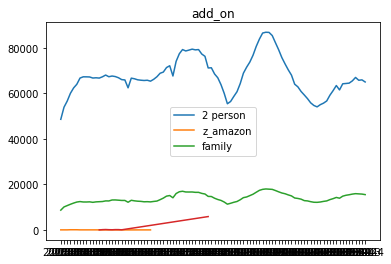

In [198]:
for product_type in df_train.product_type.unique():
    df_sample = df_train[df_train.product_type == product_type]
    df_sample_agg = df_sample.groupby("year_week").sales.sum()
    plt.title(product_type)
    plt.legend()
    plt.plot(df_sample_agg, label=product_type);

In [199]:
df_test.product_type.value_counts()

2 person    160
family      160
Name: product_type, dtype: int64

It doesn't look like other types are being used

In [200]:
df_train[df_train.product_type == "2 person"].isnull().sum().sum()

4205

In [201]:
df_train[df_train.product_type == "family"].isnull().sum().sum()

4212

# Read the test data

In [202]:
pd.set_option('display.max_colwidth', 100)

In [203]:
df_test = pd.read_csv(
    "../data/test_data_cleaned.csv",
    # Note: some of the variables should be treated as 
    dtype={"year_week": str, "recipe_id": str},
)
df_test.shape

(320, 27)

In [205]:
df_test.head().drop(columns=["description"])

,year_week,recipe_id,recipe_name,product_type,calories,carbs,cooking_time,cuisine,difficulty,dish_type,heat_level,fat,is_classic,number_of_ingredients_per_recipe,preferences,carbs_content,dish_types,seasons,protein_types,proteins,course_type,cooking_tip,meta_tags,percentage_of_local_ingredients,protein_cuts,sales
0,201945,38287,Juicy Lucy Meatloaf,2 person,990.0,65.0,time_level_5,mexican,easy,meat,no_heat,64.0,No,9,"beef,dairy","potato,panko_and_breadcrumbs",meat_and_side,NaN,"beef,dairy",42.0,main,NaN,kid_friendly,0.0,ground_mince,NaN
1,201945,38309,Baja-Style Cauliflower Tacos,2 person,790.0,60.0,time_level_4,mexican,easy,veggie,no_heat,58.0,No,9,dairy,tortillas_and_wraps,tacos_tortillas_dishes,all_seasons,dairy,12.0,main,NaN,quick,0.0,no_cut,NaN
2,201945,38310,Baja-Style Cauliflower Tacos,family,690.0,60.0,time_level_4,mexican,easy,veggie,no_heat,46.0,No,9,dairy,tortillas_and_wraps,tacos_tortillas_dishes,all_seasons,dairy,12.0,main,NaN,quick,0.0,no_cut,NaN
3,201945,38311,Brown Butter Cheese Ravioli,2 person,830.0,57.0,time_level_3,new_american,easy,veggie,no_heat,59.0,No,6,dairy,pasta_incl_gnocchi_spatzle,pasta,all_seasons,dairy,20.0,main,NaN,"kid_friendly,quick",0.0,no_cut,NaN
4,201945,38312,Brown Butter Cheese Ravioli,family,770.0,51.0,time_level_3,new_american,easy,veggie,no_heat,55.0,No,6,dairy,pasta_incl_gnocchi_spatzle,pasta,all_seasons,dairy,20.0,main,NaN,"kid_friendly,quick",0.0,no_cut,NaN


In [206]:
df_test.tail().drop(columns=["description"])

,year_week,recipe_id,recipe_name,product_type,calories,carbs,cooking_time,cuisine,difficulty,dish_type,heat_level,fat,is_classic,number_of_ingredients_per_recipe,preferences,carbs_content,dish_types,seasons,protein_types,proteins,course_type,cooking_tip,meta_tags,percentage_of_local_ingredients,protein_cuts,sales
315,201952,40222,Crispy Egg Foo Young Pancake,2 person,680.0,75.0,time_level_4,chinese,easy,veggie,no_heat,38.0,No,9,egg,low_carb,veggie_and_side,NaN,egg,15.0,main,NaN,"quick,healthy_choice",0.0,no_cut,NaN
316,201952,40223,Crispy Egg Foo Young Pancake,family,470.0,48.0,time_level_4,chinese,easy,veggie,no_heat,30.0,No,9,egg,low_carb,veggie_and_side,NaN,egg,9.0,main,NaN,"quick,healthy_choice",0.0,no_cut,NaN
317,201952,40224,Cheesy Holiday Brunch Bake,2 person,430.0,21.0,time_level_5,american,easy,meat,no_heat,27.0,No,5,poultry,bread_and_others,oven_backed,winter,poultry,24.0,main,NaN,kid_friendly,0.0,ground_mince,NaN
318,201952,40226,Quick & Easy Beef Pastitsio,2 person,1170.0,80.0,time_level_4,mediterranean,easy,meat,no_heat,72.0,No,9,beef,pasta_incl_gnocchi_spatzle,"pasta,meat_and_side",NaN,beef,51.0,main,NaN,kid_friendly,0.0,ground_mince,NaN
319,201952,40393,Moroccan Roast Pork Tenderloin,family,700.0,55.0,time_level_5,mediterranean,easy,meat,no_heat,39.0,No,8,"dairy,pork",sweet_potato,meat_and_side,NaN,"dairy,pork",37.0,main,NaN,healthy_choice,0.0,tenderloin,NaN


###  sanity checks

In [211]:
# Number of NaNs per each row
# At least one nan in sales and cooking tip columns
df_test.isnull().sum(axis=1).value_counts()

3    190
2     84
4     44
5      2
dtype: int64

In [209]:
# Note: sorting trick helps to separate numerical from categorical variables
df_test.describe(include="all").T.sort_values("top")

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
product_type,320,2,2 person,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_week,320,8,201949,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recipe_id,320,318,39376,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recipe_name,320,156,Fresh Pappardelle,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_classic,320,1,No,320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,320,159,These sides are perfect for feeding a crowd! The recipe for these spuds comes from Martha Stewar...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seasons,94,4,all_seasons,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN
difficulty,320,1,easy,320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
meta_tags,308,12,"kid_friendly,healthy_choice",66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
course_type,318,3,main,312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
